# Clustering with K-means: Introduction with Iris

## In class:

- Understand the usage of K-means
- Understand the Elbow method


## Preparting the dataset

In [ ]:
# iris data
from sklearn.datasets import load_iris

# Load iris data into samples
samples = load_iris()
print(samples)

X = samples.data
print('X shape:', X.shape)
y = samples.target
print('y shape:', y.shape)


"""
X:
1) SepalLength (Cm)
2) SepalWidth (Cm)
3) PetalLength (Cm)
4) PetalWidth (Cm)
y: Species
"""

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

'\nX:\n1) SepalLength (Cm)\n2) SepalWidth (Cm)\n3) PetalLength (Cm)\n4) PetalWidth (Cm)\ny: Species\n'

## sample data points

In [ ]:
print('x:', X[:3])
print('y:', y[:3])

x: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
y: [0 0 0]


## Clustering with K-means

We need to know the "number of clusters". Iris dataset has 3 classes, we assume it to have 3 clusters as well. This is just to introduce you to how to use K-means.

In reality, you will not know the number of clusters beforehand!

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
# we only put X (not y)
model.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [ ]:
# try predict the cluster of X
y_pred = model.predict(X)
print('predict:', y_pred.shape)
print(y_pred)

predict: (150,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Visualize the clusters (Qualitatively)

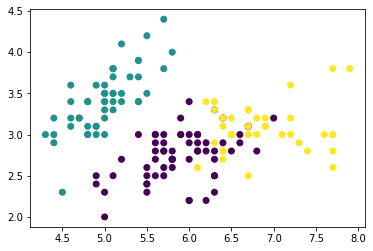

In [ ]:
import matplotlib.pyplot as plt
# we use scatter plot
# c=y; we color the dots by clusters
# however, we can only plot 2 dimensions (out of 4)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

In [ ]:
# Try using plotly.express instead of matplotlib.pyplot
import plotly.express as px
X = px.data.iris()
fig = px.scatter(X, x="sepal_length", y="sepal_width", color="species")
fig.show()


### Comparing to the ground truth labels

Text(0.5, 1.0, 'K-Means')

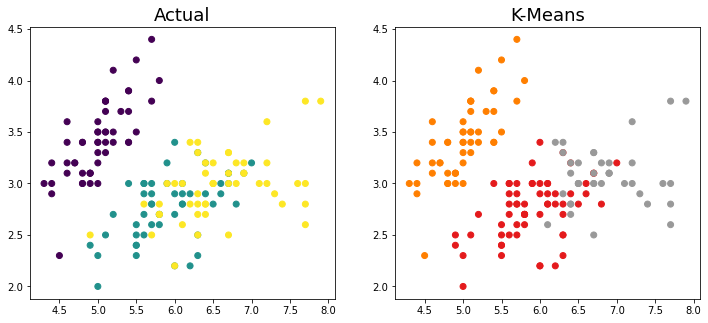

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].scatter(X.iloc[:,0], X.iloc[:,1], c=y)
ax[1].scatter(X.iloc[:,0], X.iloc[:,1], c=y_pred, cmap=plt.cm.Set1)
ax[0].set_title('Actual', fontsize=18)
ax[1].set_title('K-Means', fontsize=18)

## Measuring the "fitness" quantitatively with "inertia"


In [ ]:
# this is the "sum of squared" distance for all points to their centers
# better fitted model should have a lower inertia
print('inertia:', model.inertia_)

inertia: 78.851441426146


## Finding the right "K" using Elbow method


In [ ]:
# Run K-means for a set of k
from tqdm import tqdm
distortions = []
models = []
K = list(range(1, 10+1))
X = samples.data
for k in tqdm(K):
    model = KMeans(n_clusters=k)
    model.fit(X)
    models.append(model)
    distortions.append(model.inertia_)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The def

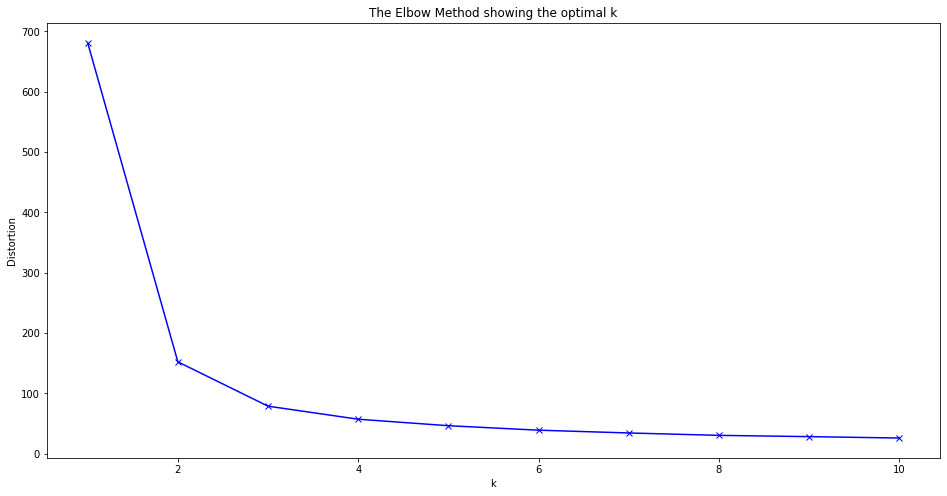

In [ ]:
# Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Clustering with different K

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
ax = [*ax[0], *ax[1]]
for k, model, ax in zip(K, models, ax):
  y_pred = model.predict(X)
  ax.set_title(f'K={k}')
  ax.scatter(X[:,0], X[:,1], c=y_pred, s=16)

NameError: ignored